In [1]:
from qiskit import QuantumCircuit, execute, Aer
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from math import pi
from itertools import cycle
from scipy.optimize import minimize
import seaborn as sns
from VQA import * 
backend = Aer.get_backend('unitary_simulator')

In [4]:
#optimization for multiple depths and number of qubits 

#The code approximates an operator in matrix form and shows how the approximation improves by increasing the depth.
#If the operator to be approximated (target_op in the code) can change with the number of qubits(by default it is 
#a k-controlled NOT gate) the range of qubits on which it acts can be selected.
#The code returns the absolute value of the Hilbert-Schmidth product divided by the size of the Hilbert space, making
#the values range from 0 to 1, the closser to 1 the better the approximation.

nqubits_initial=3
nqubits_final=5
depth=6
ansatz="shea" #by default it is the simplified hardware eficient ansatz

values_all=[] #Values for all qubits and depths

for n in range(nqubits_final-nqubits_initial+1):
    n=n+nqubits_initial
    ns=2**n #number of states
    
    target_op=cnx(n)[:] #Operator to be approximated, by default it is a k-controlled NOT
    
    entangs=entanglers(n,ansatz)[:] #matrix form of the entanglers, 
                                     #this was made to make the code more efficient.
    values_n=[] #Values for n qubits
    for dep in range(depth):        
        d=dep+1
        
        # number of parameters per qubit per layer
        if ansatz=="hea":
            ngl=4*n*d 
        elif ansatz=="shea":
            ngl=3*n*d 
            
        p=np.random.rand(ngl)*2*pi #initial random parameters
        
        #Minimization
        def cost_f (p):
            cost_f=F(p,ansatz,n,d,entangs,target_op)
            return cost_f
        result = minimize(cost_f, p, options={'maxiter': 300}, callback=None, 
                  tol=1e-7, method="L-BFGS-B")
        values_n.append(np.absolute(cost_f(result.x))/ns)
        
    values_all.append(values_n)
values_all

[[0.3535533904674441,
  0.6035533885829774,
  0.8514692445885826,
  0.9238792916621408,
  0.9999999903086718,
  0.9999986383828103],
 [0.1970549991732502,
  0.437499998975299,
  0.515388182767207,
  0.6249999988941345,
  0.8749999948286596,
  0.8749999870619539],
 [0.12966989629227166,
  0.2406083358852824,
  0.33616920976203984,
  0.3977480063721988,
  0.507694091049167,
  0.667939960475467]]

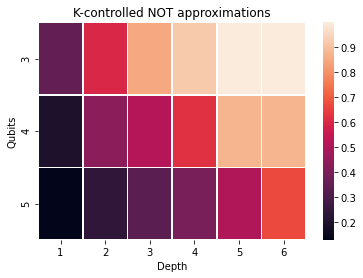

In [5]:
nqubits=[str(x+nqubits_initial) for x in range(nqubits_final-nqubits_initial+1)]
nlayers=[str(x+1) for x in range(depth)]
ax = sns.heatmap(values_all, linewidth=0.5)
ax.set_xticklabels(nlayers)
ax.set_yticklabels(nqubits)

plt.xlabel("Depth")
plt.ylabel("Qubits")
plt.title('K-controlled NOT approximations')
plt.show()